# Testing

In [1]:
from Lab_Analyses.Utilities import load_mat_files
from Lab_Analyses.Behavior import process_lever_behavior as plb
from Lab_Analyses.Behavior import summarize_lever_behavior as slb

In [2]:
path = r'Z:\People\Jake\Behavior\JW002\practice_training\211118\JW0002'
fname = 'data_@lever2p_ITIOptoPulsed_JW_JW002_21118a'

behavior_data = plb.process_lever_press_behavior(path, False)

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\process_lever_behavior.py:411: ComplexWarning: Casting complex values to real discards the imaginary part
  lever_velocity_envelope = np.sqrt(


In [3]:
summarized_data = slb.summarize_lever_behavior(behavior_data)

Animal was moving at the beginning of trial 2!
Animal was moving at the beginning of trial 7!
Animal was moving at the beginning of trial 8!
Animal was moving at the beginning of trial 10!
Animal was moving at the beginning of trial 12!
Animal was moving at the beginning of trial 13!
Animal was moving at the beginning of trial 19!
Animal was moving at the beginning of trial 27!
Animal was moving at the beginning of trial 34!
Animal was moving at the beginning of trial 43!
Animal was moving at the beginning of trial 60!
Animal was moving at the beginning of trial 93!


(-2.5, 0.0)

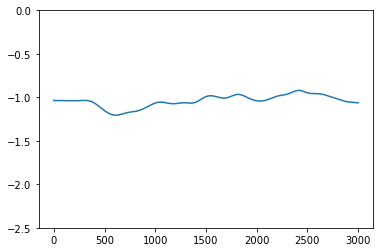

In [5]:
summarized_data.__dict__.keys()
import matplotlib.pyplot as plt
plt.figure()
plt.plot(summarized_data.movement_avg)
plt.ylim(-2.5,0)

In [12]:
summarized_data.__dict__.keys()

dict_keys(['used_trial', 'movement_matrix', 'movement_avg', 'rewards', 'move_at_start_faults', 'avg_reaction_time', 'avg_cue_to_reward', 'trials', 'move_duration_before_cue', 'number_of_movements_during_ITI', 'fraction_ITI_spent_moving'])

In [22]:
import numpy as np
import scipy.signal as sysignal

In [21]:
summarized_data.number_of_movements_during_ITI

[0,
 2,
 4,
 3,
 2,
 3,
 2,
 3,
 3,
 1,
 1,
 37,
 1,
 47,
 52,
 60,
 1,
 66,
 1,
 72,
 79,
 1,
 81,
 1,
 93,
 1,
 3,
 109,
 115,
 125,
 1,
 135,
 154,
 156,
 180,
 4,
 187]

In [23]:
file = behavior_data

successful_movements = []  # movement trace for rewarded movements for each trial
cue_to_reward = []  # movement trace from cue to reward delivery
post_success_licking = []  # licking trace following reward delivery
faults = []
# num_trials = len(file.behavior_frames)  # Number of trials performed
trial_used = []
used_trial = []  # Boolean list indicating if a trial was used or ignored
reaction_time = []  # Reaction time values
cs2r = []  # time from cue to reward delivery
trial_length = []  # Length of each trial
move_duration_before_cue = []  # Duration of movement before cue
movement_matrix = []  # 2D array of the movements for each trial
number_of_movements_during_ITI = []  # Number of movements during ITI
fraction_ITI_spent_moving = []  # Fraction of ITI time spent moving
# Set up temporary variables
rewards = 0  # Reward counter
move_at_start_fault = 0
reward_times = []
trial_ends = []
movements = []
past_threshold_reward_trials = []

xsg_data = file.xsg_data.channels["Trial_number"]
bit_code = plb.read_bit_code(xsg_data)
bitcode = bit_code[:, 1]
num_trials = file.dispatcher_data.saved.ProtocolsSection_n_done_trials

In [24]:
boundary_frames = np.nonzero(np.diff(np.insert(file.lever_active.astype(float),[0, len(file.lever_active)],np.Inf,axis=0))!= 0)[0]
if boundary_frames[0] == 0:
    boundary_frames = boundary_frames[1:]


In [25]:
bitcode_offset = bitcode - np.arange(1, len(bitcode) + 1)
bitcode_offset

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
### Setting trial number
num = 0
trial = file.dispatcher_data.saved_history.ProtocolsSection_parsed_events[num]

In [27]:
i_bitcode = (num) - np.absolute(bitcode_offset[num])
i_bitcode = int(i_bitcode)
start_trial = np.round(
            bit_code[i_bitcode, 0] * 1000
        )
t0 = trial.states.bitcode[0]
end_trial = int(
            start_trial + np.round((trial.states.state_0[1, 0] - t0) * 1000)
        )
end_trial

26044

In [ ]:
movethresh = 0.0007
lever_active = (lever_velocity_envelope_smooth > movethresh).astype(int)
movement_leeway = 150  # ms to extend the movment total (half on each end)
movement_leeway_filt = np.ones(movement_leeway, dtype=int)
npad = len(movement_leeway_filt) - 1
lever_active_padded = np.pad(
        lever_active, (npad // 2, npad - npad // 2), mode="constant"
    )
lever_active = (
        np.convolve(lever_active_padded, movement_leeway_filt, "valid")
        .astype(bool)
        .astype(int)
    )
gap_allowance = 500  # in ms
(
        lever_active_starts,
        lever_active_stops,
        _,
        lever_active_intermovement_times,
) = get_lever_active_points(lever_active)
lever_active_fill = lever_active_intermovement_times < gap_allowance
for i in np.nonzero(lever_active_fill)[0]:
    lever_active[lever_active_stops[i] : lever_active_starts[i + 1]] = 1

minimum_movement_fast = 0  ## Not using since small movements seemed real
minimum_movemet = minimum_movement_fast + movement_leeway
(
        lever_active_starts,
        lever_active_stops,
        lever_active_movement_times,
        _,
) = get_lever_active_points(lever_active)
lever_active_erase = lever_active_movement_times < minimum_movemet
for i in np.nonzero(lever_active_erase)[0]:
    lever_active[lever_active_starts[i] : lever_active_stops[i]] = 0
(lever_active_starts, lever_active_stops, _, _,) = get_lever_active_points(
        lever_active
)
if lever_active_starts[0] == 0:
    lever_active[0 : lever_active_stops[0] + 1] = 0
if lever_active_stops[-1] == len(lever_force_resample) - 1:
    lever_active[lever_active_starts[-1] :] = 0
(lever_active_starts, lever_active_stops, _, _,) = get_lever_active_points(
        lever_active
)
noise = (
        lever_force_resample[np.where(lever_active == 0)]
        - lever_force_smooth[np.where(lever_active == 0)]
    )
noise_cutoff = np.percentile(noise, 99)
move_start_values = lever_force_smooth[lever_active_starts]
move_start_cutoffs = move_start_values + noise_cutoff
move_stop_values = lever_force_smooth[lever_active_stops]
move_stop_cutoffs = move_stop_values + noise_cutoff
splits = list(zip(lever_active_starts, lever_active_stops + 1))
movement_epochs = [lever_force_resample[x:y] for x, y in splits]
# Look for trace consecutively past threshold
thresh_run = 3

In [ ]:
def get_move_start_offset(w, x, y, z, thresh_run):
    """Helper function to get movement start offsets"""
    u = (np.absolute(x - w) > np.absolute(y - w)).astype(int)
    v = np.ones(thresh_run)
    npad = len(v) - 1
    u_padded = np.pad(u, (npad // 2, npad - npad // 2), mode="constant")
    conv = np.convolve(u_padded, v, "valid")
    flr = np.floor(thresh_run / 2)
    find = np.nonzero(conv >= thresh_run)[0][0]
    end = find - flr
    result = np.arange(z, z + end + 2)

    return result


def get_move_stop_offset(w, x, y, z, thresh_run):
    """Helper function to get movment stop offsets"""
    u = (np.absolute(x[::-1] - w) > np.absolute(y - w)).astype(int)
    v = np.ones(thresh_run)
    npad = len(v) - 1
    u_padded = np.pad(u, (npad // 2, npad - npad // 2), mode="constant")
    conv = np.convolve(u_padded, v, "valid")
    flr = np.floor(thresh_run / 2)
    find = np.nonzero(conv >= thresh_run)[0][0]
    end = z - find + flr - 1  # weird indexing issue
    result = np.arange(end, z + 1)

    return result

In [ ]:
def get_lever_active_points(lever_active):
    """Helper function to get active_lever_switch, active_lever_starts, active_lever_stops"""
    lever_active_switch = np.diff(lever_active, prepend=0, append=0)
    lever_active_starts = np.argwhere(lever_active_switch == 1).flatten()
    lever_active_stops = np.argwhere(lever_active_switch == -1).flatten() -1
    lever_active_movement_times = (lever_active_stops) - (
        lever_active_starts + 1
    )  # Accounting for index differences
    lever_active_intermovement_times = (lever_active_starts[1:]) - lever_active_stops[
        0:-1
    ]  # Accounting for index differences

    return (
        lever_active_starts,
        lever_active_stops,
        lever_active_movement_times,
        lever_active_intermovement_times,
    )

In [ ]:
movement_start_offsets = []
for w, x, y, z in zip(
        move_start_values, movement_epochs, move_start_cutoffs, lever_active_starts
    ):
    offset = get_move_start_offset(w, x, y, z, thresh_run)
    movement_start_offsets.append(offset.astype(int))
movement_stop_offsets = []
for w, x, y, z in zip(
        move_stop_values, movement_epochs, move_stop_cutoffs, lever_active_stops
    ):
    offset = get_move_stop_offset(w, x, y, z, thresh_run)
    movement_stop_offsets.append(offset.astype(int))

lever_active[np.concatenate(movement_start_offsets)] = 0
lever_active[np.concatenate(movement_stop_offsets)] = 0

In [ ]:
np.nonzero(lever_active)[0]

In [ ]:
movement_stop_offsets[2]

In [ ]:
np.floor(thresh_run / 2)

In [ ]:
x[::-1]